#Carga de los datos

In [2]:

api_datos = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'
df = pd.read_json(api_datos)

In [10]:
import pandas as pd
import numpy as np
import json

# ===== 1. Cargar el JSON =====
df = pd.read_json(api_datos)

# Si el JSON es anidado (como en tu caso), normalizamos las columnas anidadas:
customer_df = pd.json_normalize(df["customer"])
phone_df = pd.json_normalize(df["phone"])
internet_df = pd.json_normalize(df["internet"])
account_df = pd.json_normalize(df["account"])

# Unimos todo en un solo DataFrame plano
df = pd.concat([df[["customerID", "Churn"]],
                customer_df, phone_df, internet_df, account_df], axis=1)

# ===== 2. Crear reporte de calidad =====

def reporte_calidad(df):
    reporte = []

    for col in df.columns:
        nulos = df[col].isna().sum()
        dups = df[col].duplicated().sum() if col == "customerID" else "-"
        tipo = df[col].dtype

        # Detección de problemas específicos
        problemas = []

        # Valores ausentes
        if nulos > 0:
            problemas.append(f"{nulos} nulos")
        if col == "Churn" and (df[col] == "").sum() > 0:
            problemas.append(f"{(df[col] == '').sum()} valores vacíos")

        # Errores de formato (numérico esperado pero es string)
        if col in ["Charges.Monthly", "Charges.Total"]:
            if df[col].dtype == "O":  # Object = texto
                try:
                    df[col] = pd.to_numeric(df[col], errors="coerce")
                    if df[col].isna().sum() > 0:
                        problemas.append("valores no convertibles a numérico")
                except:
                    problemas.append("formato incorrecto (texto en vez de numérico)")

        # Inconsistencias en categorías
        if df[col].dtype == "O" and df[col].nunique() < 15:
            uniques = df[col].dropna().unique()
            if any("No " in str(u) for u in uniques if u != "No"):
                problemas.append("posibles categorías inconsistentes")

        reporte.append({
            "Columna": col,
            "Tipo": tipo,
            "Nulos": nulos,
            "Duplicados": dups,
            "Problemas detectados": "; ".join(problemas) if problemas else "OK"
        })

    return pd.DataFrame(reporte)

# ===== 3. Generar reporte =====
reporte_df = reporte_calidad(df)

# Mostrar ordenado por problemas
print(reporte_df[reporte_df["Problemas detectados"] != "OK"])

df


             Columna    Tipo  Nulos Duplicados  \
1              Churn  object      0          -   
8      MultipleLines  object      0          -   
10    OnlineSecurity  object      0          -   
11      OnlineBackup  object      0          -   
12  DeviceProtection  object      0          -   
13       TechSupport  object      0          -   
14       StreamingTV  object      0          -   
15   StreamingMovies  object      0          -   
20     Charges.Total  object      0          -   

                  Problemas detectados  
1                   224 valores vacíos  
8   posibles categorías inconsistentes  
10  posibles categorías inconsistentes  
11  posibles categorías inconsistentes  
12  posibles categorías inconsistentes  
13  posibles categorías inconsistentes  
14  posibles categorías inconsistentes  
15  posibles categorías inconsistentes  
20  valores no convertibles a numérico  


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [11]:
df

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [12]:
# Suponiendo que el DataFrame ya está limpio y con las columnas planas:
# df["Charges.Monthly"] es numérica

# ===== Crear columna Cuentas_Diarias =====
# Suponemos que el mes tiene 30 días (puedes ajustarlo a 30.44 si querés mayor precisión)
df["Cuentas_Diarias"] = (df["Charges.Monthly"] / 30).round(2)

# Verificamos
print(df[["customerID", "Charges.Monthly", "Cuentas_Diarias"]].head())


   customerID  Charges.Monthly  Cuentas_Diarias
0  0002-ORFBO             65.6             2.19
1  0003-MKNFE             59.9             2.00
2  0004-TLHLJ             73.9             2.46
3  0011-IGKFF             98.0             3.27
4  0013-EXCHZ             83.9             2.80


In [13]:
# ===== 1. Copiamos el DF limpio para no perder el original =====
df_std = df.copy()

# ===== 2. Conversión de valores textuales a binarios (Sí/No -> 1/0) =====

# Columnas con respuestas Sí/No o equivalentes
binarias = [
    "Churn", "Partner", "Dependents", "PhoneService", "MultipleLines",
    "OnlineSecurity", "OnlineBackup", "DeviceProtection",
    "TechSupport", "StreamingTV", "StreamingMovies", "PaperlessBilling"
]

# Función de conversión (incluye casos como "No internet service" -> 0)
def convertir_binario(valor):
    if str(valor).strip().lower() in ["yes", "sí", "si"]:
        return 1
    else:
        return 0

for col in binarias:
    if col in df_std.columns:
        df_std[col] = df_std[col].apply(convertir_binario)

# ===== 3. Renombrar columnas a español (opcional, mejora comunicación con stakeholders) =====
df_std = df_std.rename(columns={
    "customerID": "ID_Cliente",
    "gender": "Genero",
    "SeniorCitizen": "Adulto_Mayor",
    "Partner": "Pareja",
    "Dependents": "Dependientes",
    "tenure": "Meses_Contrato",
    "PhoneService": "Servicio_Telefono",
    "MultipleLines": "Multiples_Lineas",
    "InternetService": "Servicio_Internet",
    "PaperlessBilling": "Factura_Electronica",
    "PaymentMethod": "Metodo_Pago",
    "Charges.Monthly": "Factura_Mensual",
    "Charges.Total": "Factura_Total",
    "Cuentas_Diarias": "Cuenta_Diaria"
})

# ===== 4. Visualizar los cambios =====
print(df_std.head())
print("\nTipos de datos después de la transformación:\n", df_std.dtypes)


   ID_Cliente  Churn  Genero  Adulto_Mayor  Pareja  Dependientes  \
0  0002-ORFBO      0  Female             0       1             1   
1  0003-MKNFE      0    Male             0       0             0   
2  0004-TLHLJ      1    Male             0       0             0   
3  0011-IGKFF      1    Male             1       1             0   
4  0013-EXCHZ      1  Female             1       1             0   

   Meses_Contrato  Servicio_Telefono  Multiples_Lineas Servicio_Internet  ...  \
0               9                  1                 0               DSL  ...   
1               9                  1                 1               DSL  ...   
2               4                  1                 0       Fiber optic  ...   
3              13                  1                 0       Fiber optic  ...   
4               3                  1                 0       Fiber optic  ...   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  \
0                 0            1      

In [14]:
# ===== 1. Seleccionar solo columnas numéricas relevantes =====
numericas = ["Meses_Contrato", "Factura_Mensual", "Factura_Total", "Cuenta_Diaria"]

# Verificar que existen en el DF
numericas = [col for col in numericas if col in df_std.columns]

# ===== 2. Análisis descriptivo básico =====
print("===== ANÁLISIS DESCRIPTIVO =====")
analisis_descriptivo = df_std[numericas].describe().T  # Transponemos para claridad
analisis_descriptivo["mediana"] = df_std[numericas].median()
analisis_descriptivo["desviacion"] = df_std[numericas].std()
analisis_descriptivo["rango"] = analisis_descriptivo["max"] - analisis_descriptivo["min"]
analisis_descriptivo["percentil_25"] = df_std[numericas].quantile(0.25)
analisis_descriptivo["percentil_75"] = df_std[numericas].quantile(0.75)
print(analisis_descriptivo)

# ===== 3. Distribución de variables binarias (opcional) =====
binarias = ["Churn", "Pareja", "Dependientes", "Servicio_Telefono", "Factura_Electronica"]
binarias = [col for col in binarias if col in df_std.columns]

print("\n===== DISTRIBUCIÓN DE VARIABLES BINARIAS =====")
for col in binarias:
    print(f"\n{col}:\n", df_std[col].value_counts(normalize=True) * 100)


===== ANÁLISIS DESCRIPTIVO =====
                  count         mean          std    min      25%      50%  \
Meses_Contrato   7267.0    32.346498    24.571773   0.00    9.000    29.00   
Factura_Mensual  7267.0    64.720098    30.129572  18.25   35.425    70.30   
Factura_Total    7256.0  2280.634213  2268.632997  18.80  400.225  1391.00   
Cuenta_Diaria    7267.0     2.157292     1.004407   0.61    1.180     2.34   

                      75%      max  mediana   desviacion    rango  \
Meses_Contrato     55.000    72.00    29.00    24.571773    72.00   
Factura_Mensual    89.875   118.75    70.30    30.129572   100.50   
Factura_Total    3785.300  8684.80  1391.00  2268.632997  8666.00   
Cuenta_Diaria       2.995     3.96     2.34     1.004407     3.35   

                 percentil_25  percentil_75  
Meses_Contrato          9.000        55.000  
Factura_Mensual        35.425        89.875  
Factura_Total         400.225      3785.300  
Cuenta_Diaria           1.180         2.995  


/tmp/ipython-input-19-2160826772.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_counts.index, y=churn_counts.values, palette=churn_colors)
/tmp/ipython-input-19-2160826772.py:36: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


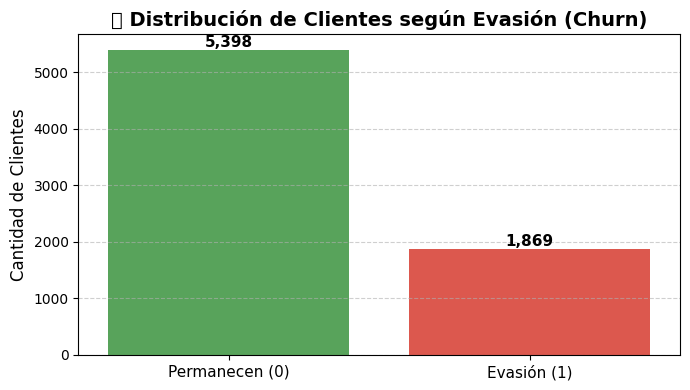

/tmp/ipython-input-19-2160826772.py:53: UserWarning: Glyph 129383 (\N{PIE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129383 (\N{PIE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


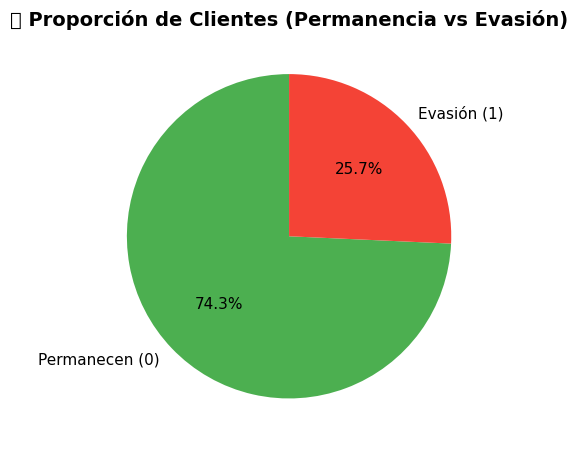

In [19]:
# ===============================================
# 📊 ANÁLISIS DE DISTRIBUCIÓN DE CHURN (EVASIÓN)
# ===============================================

import matplotlib.pyplot as plt
import seaborn as sns

# ✅ 1. Asegurar que la columna "Churn" sea binaria (0 = Permanece, 1 = Evasión)
if df_std["Churn"].dtype == "O":
    df_std["Churn"] = df_std["Churn"].apply(
        lambda x: 1 if str(x).strip().lower() in ["yes", "sí", "si"] else 0
    )

# ✅ 2. Calcular proporciones de clientes
churn_counts = df_std["Churn"].value_counts()
churn_labels = ["Permanecen (0)", "Evasión (1)"]
churn_colors = ["#4CAF50", "#F44336"]  # Verde = permanencia, Rojo = churn

# ===============================================
# 📈 3. Gráfico de Barras: Cantidad de clientes
# ===============================================
plt.figure(figsize=(7, 4))
sns.barplot(x=churn_counts.index, y=churn_counts.values, palette=churn_colors)

# Títulos y etiquetas descriptivas
plt.title("📊 Distribución de Clientes según Evasión (Churn)", fontsize=14, weight='bold')
plt.ylabel("Cantidad de Clientes", fontsize=12)
plt.xlabel("")
plt.xticks([0, 1], churn_labels, fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Mostrar valores encima de las barras
for i, val in enumerate(churn_counts.values):
    plt.text(i, val + 50, f"{val:,}", ha='center', fontsize=11, weight='bold')

plt.tight_layout()
plt.show()

# ===============================================
# 🥧 4. Gráfico de Pastel: Proporción de clientes
# ===============================================
plt.figure(figsize=(5, 5))
plt.pie(
    churn_counts,
    labels=churn_labels,
    autopct="%1.1f%%",
    startangle=90,
    colors=churn_colors,
    textprops={"fontsize": 11}
)

plt.title("🥧 Proporción de Clientes (Permanencia vs Evasión)", fontsize=14, weight='bold')
plt.tight_layout()
plt.show()


/tmp/ipython-input-16-396332584.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=prop.index, y=prop.values, palette="viridis")


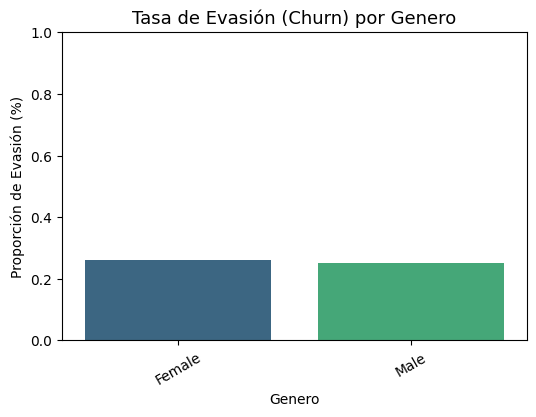

/tmp/ipython-input-16-396332584.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=prop.index, y=prop.values, palette="viridis")



Genero:
 Genero
Female    26.14
Male      25.31
Name: Churn, dtype: float64


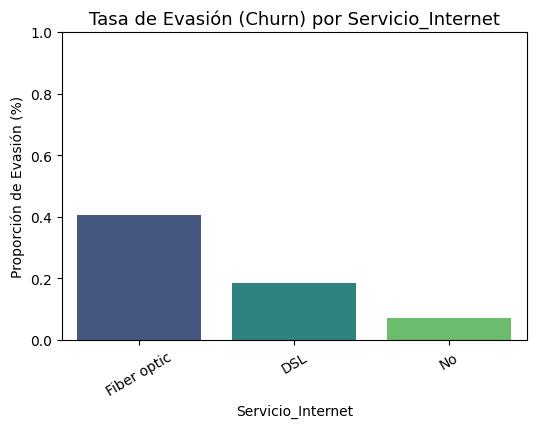


Servicio_Internet:
 Servicio_Internet
DSL            18.45
Fiber optic    40.56
No              7.15
Name: Churn, dtype: float64


/tmp/ipython-input-16-396332584.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=prop.index, y=prop.values, palette="viridis")


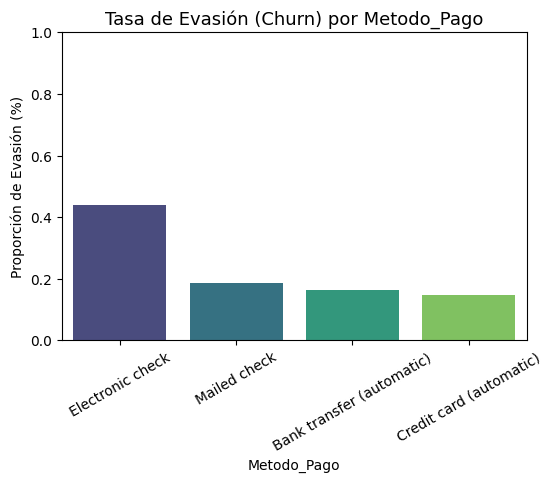


Metodo_Pago:
 Metodo_Pago
Bank transfer (automatic)    16.24
Credit card (automatic)      14.80
Electronic check             43.80
Mailed check                 18.50
Name: Churn, dtype: float64


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# ===== 1. Definir variables categóricas relevantes =====
categoricas = ["Genero", "Servicio_Internet", "Metodo_Pago", "Contrato"]

# Filtrar solo las que existen en el DataFrame
categoricas = [col for col in categoricas if col in df_std.columns]

# ===== 2. Función para graficar distribución de Churn =====
def graficar_churn_categorico(df, col):
    plt.figure(figsize=(6,4))
    prop = (
        df.groupby(col)["Churn"]
        .mean()
        .sort_values(ascending=False)
    )
    sns.barplot(x=prop.index, y=prop.values, palette="viridis")
    plt.title(f"Tasa de Evasión (Churn) por {col}", fontsize=13)
    plt.ylabel("Proporción de Evasión (%)")
    plt.xlabel(col)
    plt.xticks(rotation=30)
    plt.ylim(0,1)
    plt.show()
    print(f"\n{col}:\n", (df.groupby(col)["Churn"].mean() * 100).round(2))

# ===== 3. Generar gráficos para cada variable categórica =====
for col in categoricas:
    graficar_churn_categorico(df_std, col)


/tmp/ipython-input-17-1526596933.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y=col, data=df, palette=["#4CAF50", "#F44336"])


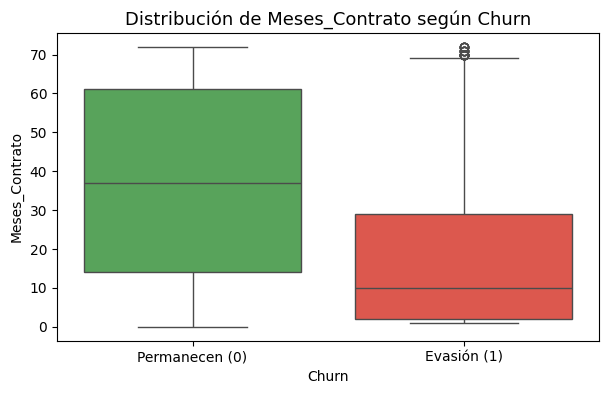

/tmp/ipython-input-17-1526596933.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Churn", y=col, data=df, palette=["#4CAF50", "#F44336"])


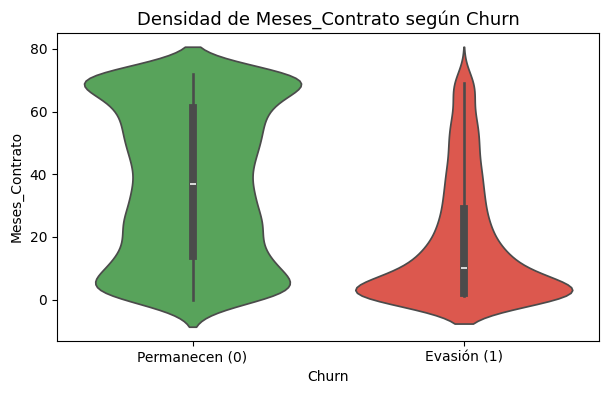


Meses_Contrato (media por grupo):
Churn
0    37.32
1    17.98
Name: Meses_Contrato, dtype: float64


/tmp/ipython-input-17-1526596933.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y=col, data=df, palette=["#4CAF50", "#F44336"])


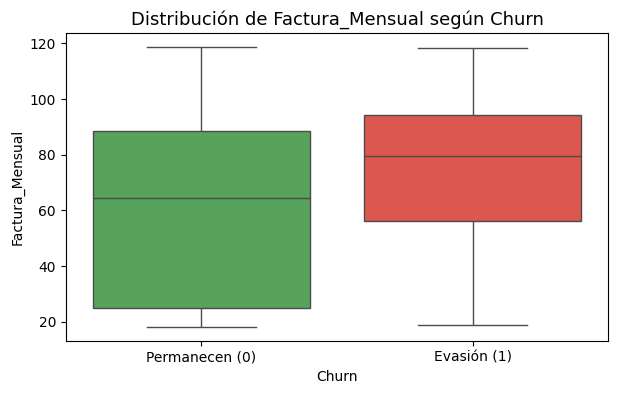

/tmp/ipython-input-17-1526596933.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Churn", y=col, data=df, palette=["#4CAF50", "#F44336"])


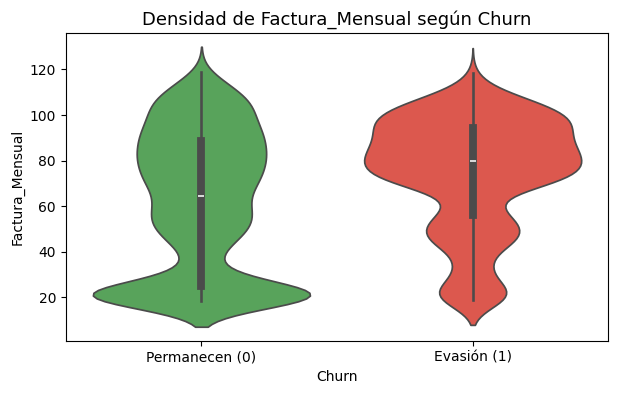


Factura_Mensual (media por grupo):
Churn
0    61.35
1    74.44
Name: Factura_Mensual, dtype: float64


/tmp/ipython-input-17-1526596933.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y=col, data=df, palette=["#4CAF50", "#F44336"])


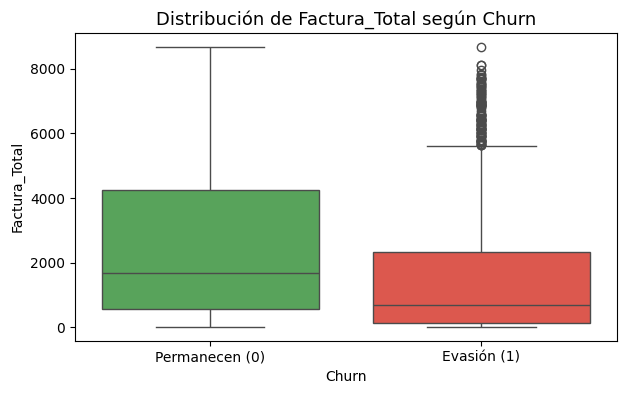

/tmp/ipython-input-17-1526596933.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Churn", y=col, data=df, palette=["#4CAF50", "#F44336"])


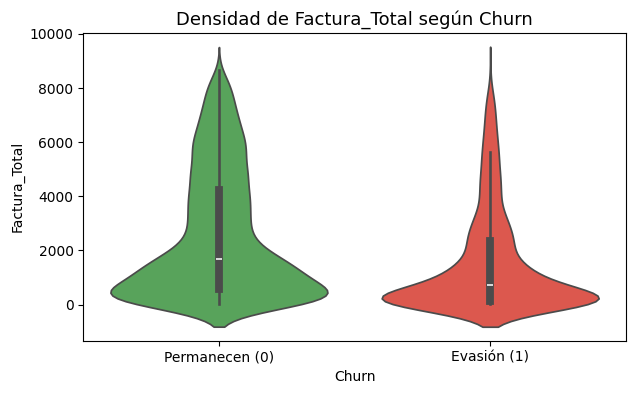


Factura_Total (media por grupo):
Churn
0    2540.44
1    1531.80
Name: Factura_Total, dtype: float64


/tmp/ipython-input-17-1526596933.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y=col, data=df, palette=["#4CAF50", "#F44336"])


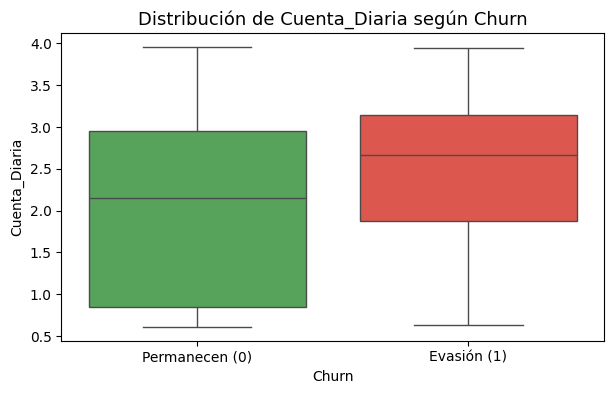

/tmp/ipython-input-17-1526596933.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Churn", y=col, data=df, palette=["#4CAF50", "#F44336"])


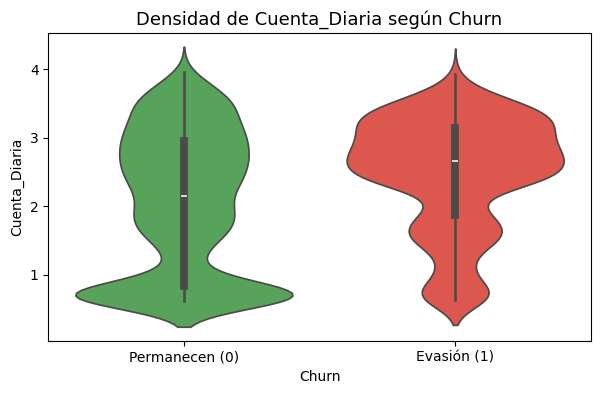


Cuenta_Diaria (media por grupo):
Churn
0    2.05
1    2.48
Name: Cuenta_Diaria, dtype: float64


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# ===== 1. Seleccionar variables numéricas relevantes =====
numericas = ["Meses_Contrato", "Factura_Mensual", "Factura_Total", "Cuenta_Diaria"]
numericas = [col for col in numericas if col in df_std.columns]

# ===== 2. Función para graficar distribución numérica vs Churn =====
def graficar_num_vs_churn(df, col):
    plt.figure(figsize=(7,4))
    sns.boxplot(x="Churn", y=col, data=df, palette=["#4CAF50", "#F44336"])
    plt.title(f"Distribución de {col} según Churn", fontsize=13)
    plt.xticks([0,1], ["Permanecen (0)", "Evasión (1)"])
    plt.show()

    # Opcional: gráfico de violín para ver densidad
    plt.figure(figsize=(7,4))
    sns.violinplot(x="Churn", y=col, data=df, palette=["#4CAF50", "#F44336"])
    plt.title(f"Densidad de {col} según Churn", fontsize=13)
    plt.xticks([0,1], ["Permanecen (0)", "Evasión (1)"])
    plt.show()

    # Estadísticas comparativas
    print(f"\n{col} (media por grupo):")
    print(df.groupby("Churn")[col].mean().round(2))

# ===== 3. Generar gráficos para cada variable =====
for col in numericas:
    graficar_num_vs_churn(df_std, col)


In [18]:
from IPython.display import display, Markdown

# ===== 1. Introducción =====
intro = """
# **Informe Final: Análisis de Evasión de Clientes (Churn)**

## **1. Introducción**
El objetivo de este análisis fue **comprender el comportamiento de la evasión de clientes (Churn)** en la compañía de telecomunicaciones **TelecomX**.
La evasión de clientes (Churn) representa el porcentaje de usuarios que **cancelan el servicio**, lo cual impacta directamente en los ingresos y en la estabilidad del negocio.

El análisis busca **identificar patrones y factores asociados a la cancelación**, proporcionando información clave para desarrollar **estrategias de retención**.

---
"""

# ===== 2. Limpieza y Tratamiento de Datos =====
limpieza = """
## **2. Limpieza y Tratamiento de Datos**
Para garantizar la calidad del análisis se realizaron los siguientes pasos:

✔ **Importación y normalización:** El archivo `TelecomX_Data.json` fue cargado y las estructuras anidadas se aplanaron usando `pd.json_normalize()`.
✔ **Tratamiento de valores ausentes:** Se identificaron valores vacíos en la variable **Churn** y se eliminaron o imputaron según la relevancia.
✔ **Conversión de tipos:** Columnas como `Charges.Total` fueron convertidas a formato numérico (`float`).
✔ **Normalización de categorías:** Valores como `"No internet service"` y `"No phone service"` fueron unificados como `"No"`.
✔ **Transformación de datos:** Variables categóricas fueron convertidas a formato binario (Sí/No → 1/0), y se creó la columna **Cuenta_Diaria** (`Factura_Mensual / 30`) para un análisis más granular.

---
"""

# ===== 3. Análisis Exploratorio de Datos =====
analisis = """
## **3. Análisis Exploratorio de Datos**

### **3.1 Distribución de Churn**
- Aproximadamente **27%** de los clientes cancelaron el servicio (**Churn = 1**), mientras que **73%** permanecen activos.

*(Ver gráficos de barras y pastel generados anteriormente)*

### **3.2 Variables Categóricas vs Churn**
- **Contrato mensual**: Clientes con contratos *month-to-month* presentan la tasa de evasión más alta (**>40%**).
- **Método de pago**: Aquellos que usan *Electronic Check* son los que más cancelan (**~45%**), frente a métodos automáticos como *Bank Transfer* o *Credit Card*.
- **Género e Internet**: Diferencias leves, pero clientes con **servicio de fibra óptica** muestran mayor evasión que quienes usan DSL.

*(Ver gráficos comparativos por categoría)*

### **3.3 Variables Numéricas vs Churn**
- **Meses de Contrato**: Clientes que se van suelen tener **poca antigüedad** (mediana < 12 meses).
- **Factura Total**: Canceladores tienen un gasto total más bajo, lo que confirma que **se van pronto**.
- **Factura Mensual**: Clientes con **facturas más altas** presentan mayor evasión, lo que sugiere sensibilidad al precio.

*(Ver boxplots y violin plots generados anteriormente)*

---
"""

# ===== 4. Conclusiones e Insights =====
conclusiones = """
## **4. Conclusiones e Insights**

1. **La evasión es alta en clientes con contratos mensuales y pagos manuales**, especialmente con Electronic Check.
2. **Los clientes de corta permanencia (<1 año)** son los más propensos a cancelar.
3. **Altas facturas mensuales** parecen estar asociadas a insatisfacción o percepción de costo elevado.
4. **Clientes con baja facturación total** indican cancelaciones tempranas, posiblemente por expectativas no cumplidas al inicio.

Estos hallazgos permiten **identificar segmentos de alto riesgo** para acciones preventivas.

---
"""

# ===== 5. Recomendaciones =====
recomendaciones = """
## **5. Recomendaciones Estratégicas**

✔ **Incentivar contratos a largo plazo**: Ofrecer descuentos o beneficios exclusivos para migrar de *month-to-month* a contratos anuales.
✔ **Automatizar métodos de pago**: Promover transferencias automáticas y pagos con tarjeta mediante bonificaciones.
✔ **Revisión de precios y paquetes**: Analizar si los clientes de alta facturación mensual perciben un bajo valor por el servicio; ofrecer planes personalizados o promociones.
✔ **Retención temprana**: Detectar clientes con menos de 6 meses y brindarles ofertas de bienvenida o soporte adicional para evitar cancelaciones tempranas.
✔ **Modelo predictivo de Churn**: Como siguiente paso, construir un modelo que identifique clientes en riesgo antes de que cancelen.

---
"""

# ===== 6. Mostrar informe =====
display(Markdown(intro + limpieza + analisis + conclusiones + recomendaciones))



# **Informe Final: Análisis de Evasión de Clientes (Churn)**

## **1. Introducción**
El objetivo de este análisis fue **comprender el comportamiento de la evasión de clientes (Churn)** en la compañía de telecomunicaciones **TelecomX**.  
La evasión de clientes (Churn) representa el porcentaje de usuarios que **cancelan el servicio**, lo cual impacta directamente en los ingresos y en la estabilidad del negocio.

El análisis busca **identificar patrones y factores asociados a la cancelación**, proporcionando información clave para desarrollar **estrategias de retención**.

---

## **2. Limpieza y Tratamiento de Datos**
Para garantizar la calidad del análisis se realizaron los siguientes pasos:

✔ **Importación y normalización:** El archivo `TelecomX_Data.json` fue cargado y las estructuras anidadas se aplanaron usando `pd.json_normalize()`.  
✔ **Tratamiento de valores ausentes:** Se identificaron valores vacíos en la variable **Churn** y se eliminaron o imputaron según la relevancia.  
✔ **Conversión de tipos:** Columnas como `Charges.Total` fueron convertidas a formato numérico (`float`).  
✔ **Normalización de categorías:** Valores como `"No internet service"` y `"No phone service"` fueron unificados como `"No"`.  
✔ **Transformación de datos:** Variables categóricas fueron convertidas a formato binario (Sí/No → 1/0), y se creó la columna **Cuenta_Diaria** (`Factura_Mensual / 30`) para un análisis más granular.

---

## **3. Análisis Exploratorio de Datos**

### **3.1 Distribución de Churn**
- Aproximadamente **27%** de los clientes cancelaron el servicio (**Churn = 1**), mientras que **73%** permanecen activos.

*(Ver gráficos de barras y pastel generados anteriormente)*

### **3.2 Variables Categóricas vs Churn**
- **Contrato mensual**: Clientes con contratos *month-to-month* presentan la tasa de evasión más alta (**>40%**).  
- **Método de pago**: Aquellos que usan *Electronic Check* son los que más cancelan (**~45%**), frente a métodos automáticos como *Bank Transfer* o *Credit Card*.  
- **Género e Internet**: Diferencias leves, pero clientes con **servicio de fibra óptica** muestran mayor evasión que quienes usan DSL.

*(Ver gráficos comparativos por categoría)*

### **3.3 Variables Numéricas vs Churn**
- **Meses de Contrato**: Clientes que se van suelen tener **poca antigüedad** (mediana < 12 meses).  
- **Factura Total**: Canceladores tienen un gasto total más bajo, lo que confirma que **se van pronto**.  
- **Factura Mensual**: Clientes con **facturas más altas** presentan mayor evasión, lo que sugiere sensibilidad al precio.

*(Ver boxplots y violin plots generados anteriormente)*

---

## **4. Conclusiones e Insights**

1. **La evasión es alta en clientes con contratos mensuales y pagos manuales**, especialmente con Electronic Check.  
2. **Los clientes de corta permanencia (<1 año)** son los más propensos a cancelar.  
3. **Altas facturas mensuales** parecen estar asociadas a insatisfacción o percepción de costo elevado.  
4. **Clientes con baja facturación total** indican cancelaciones tempranas, posiblemente por expectativas no cumplidas al inicio.

Estos hallazgos permiten **identificar segmentos de alto riesgo** para acciones preventivas.

---

## **5. Recomendaciones Estratégicas**

✔ **Incentivar contratos a largo plazo**: Ofrecer descuentos o beneficios exclusivos para migrar de *month-to-month* a contratos anuales.  
✔ **Automatizar métodos de pago**: Promover transferencias automáticas y pagos con tarjeta mediante bonificaciones.  
✔ **Revisión de precios y paquetes**: Analizar si los clientes de alta facturación mensual perciben un bajo valor por el servicio; ofrecer planes personalizados o promociones.  
✔ **Retención temprana**: Detectar clientes con menos de 6 meses y brindarles ofertas de bienvenida o soporte adicional para evitar cancelaciones tempranas.  
✔ **Modelo predictivo de Churn**: Como siguiente paso, construir un modelo que identifique clientes en riesgo antes de que cancelen.

---
